# <h1 align="center"> © RsydMathTech. <h1/>

# Model Selection: Underfitting, Overfitting, and Polynomial Order  

## 1. Konsep Utama
- **Model Selection** → proses memilih model terbaik (misalnya orde polinomial) agar bisa mendekati fungsi target secara optimal.  
- Data biasanya berasal dari **fungsi dasar + noise**.  
- Noise menyebabkan error yang **tidak bisa dihilangkan (irreducible error)**.  

---

## 2. Underfitting
- Model terlalu sederhana → gagal menangkap pola data.  
- Contoh: memodelkan data polinomial dengan model linear.  
- **Ciri-ciri**:  
  - Training error tinggi.  
  - Test error juga tinggi.  

---

## 3. Overfitting
- Model terlalu kompleks → mengikuti **noise** alih-alih pola sebenarnya.  
- Contoh: polynomial orde 16 pada data training → fit semua titik, tapi prediksi pada data baru jelek.  
- **Ciri-ciri**:  
  - Training error sangat rendah.  
  - Test error tinggi.  

---

## 4. Bias-Variance Tradeoff
- **Bias tinggi → Underfitting.**  
- **Variance tinggi → Overfitting.**  
- Tujuan: menemukan titik tengah di mana **Test Error minimal**.  

---

## 5. Visualisasi Error
- **Training Error**: selalu menurun seiring meningkatnya orde polynomial.  
- **Test Error**: berbentuk U-shape → turun dulu sampai titik optimal, lalu naik lagi.  
- **Orde optimal** = titik minimum Test Error.  

---

## 6. Contoh Kasus
- Data asli dibuat dari polynomial orde 8.  
- Model yang dicoba:
  - Linear → **Underfit**.  
  - Polynomial orde 8 → **Optimal**.  
  - Polynomial orde 16 → **Overfit**.  

---

## 7. Irreducible Error
- Bahkan dengan model terbaik, error tidak akan nol.  
- Penyebab: adanya **noise acak** yang memang tidak bisa diprediksi.  

---

## 8. Evaluasi dengan R-Squared
- Bisa pakai **$R^2$** untuk mengukur performa tiap orde polynomial.  
- Semakin mendekati 1 → semakin bagus.  
- Jika $R^2$ tiba-tiba turun drastis pada orde lebih tinggi → indikasi **overfitting**.  

---

## Kesimpulan
- **Underfitting** = model terlalu sederhana → error tinggi.  
- **Overfitting** = model terlalu kompleks → performa buruk di data baru.  
- **Model terbaik** = polynomial orde yang meminimalkan **Test Error** atau memaksimalkan **$R^2$** pada data validasi.  
- Selalu ada error minimal (irreducible error) karena noise.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### 1. Generate data (polynomial degree 8 + noise)


In [6]:
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = np.sin(X).ravel()
y = y_true + np.random.normal(0, 0.2, 100)  # noise lebih kecil biar jelas pola

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2. Coba polynomial order 1–16


In [7]:
degrees = range(1, 16)
train_mse, test_mse, r2_scores = [], [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    r2_scores.append(r2_score(y_test, y_test_pred))

### 3. Plot MSE (Train vs Test)


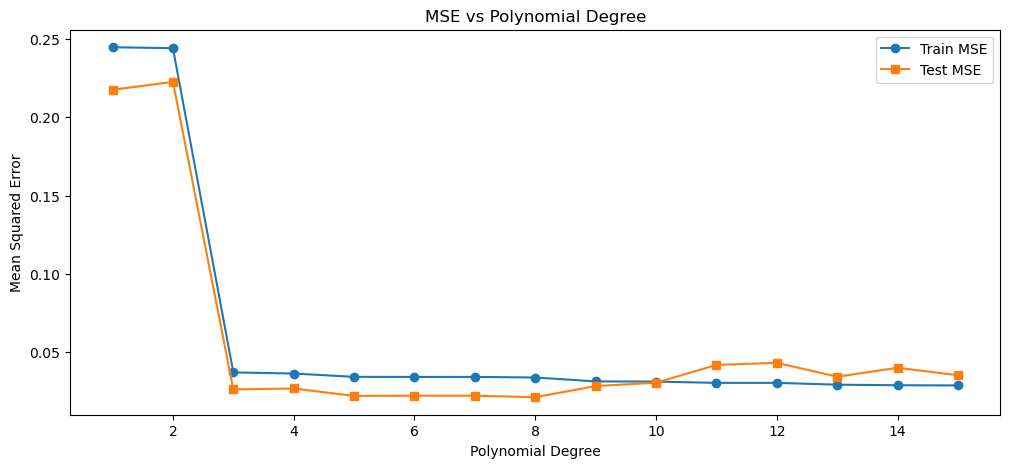

In [8]:
plt.figure(figsize=(12,5))
plt.plot(degrees, train_mse, marker='o', label="Train MSE")
plt.plot(degrees, test_mse, marker='s', label="Test MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.legend()
plt.show()

### 4. Plot R² vs Polynomial Degree


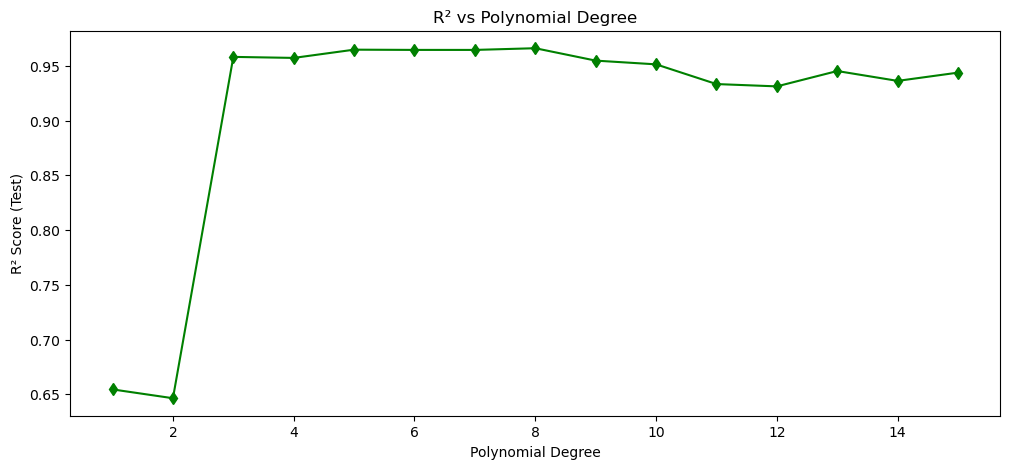

In [10]:
plt.figure(figsize=(12,5))
plt.plot(degrees, r2_scores, marker='d', color="green")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score (Test)")
plt.title("R² vs Polynomial Degree")
plt.show()

Train MSE → terus turun (model makin kompleks, makin pasin train data).

Test MSE → turun dulu (degree 3–5), lalu naik lagi (overfit).

R² Test → naik di awal → puncak di degree optimal → turun drastis jika overfit parah.

Ini setup paling sering dipake buat ngajarin bias-variance tradeoff.

### Another Example

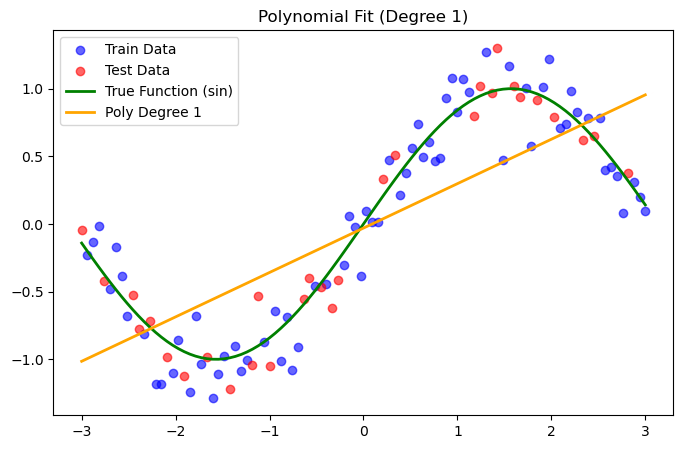

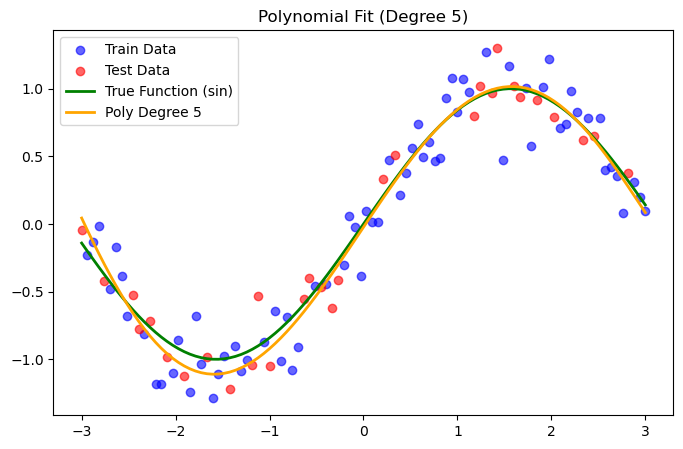

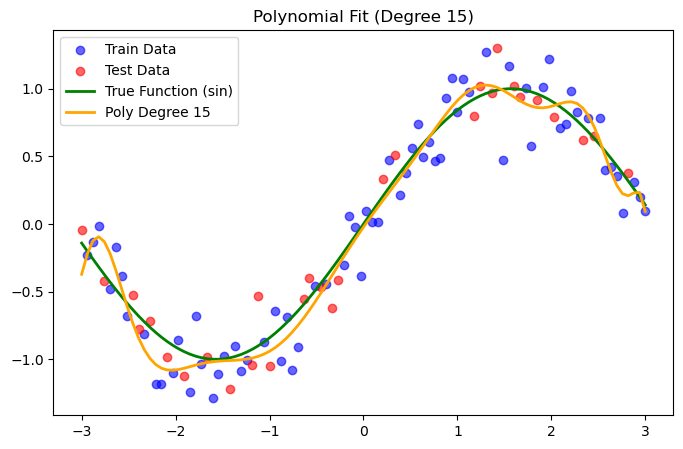

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Generate data (sinusoidal + noise kecil)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = np.sin(X).ravel()
y = y_true + np.random.normal(0, 0.2, 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Fungsi buat plot polynomial fit
def plot_poly_fit(degree, X_train, y_train, X, y_true, y):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)
    y_pred = model.predict(X_poly)
    
    plt.figure(figsize=(8,5))
    plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Train Data")
    plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Test Data")
    plt.plot(X, y_true, color="green", linewidth=2, label="True Function (sin)")
    plt.plot(X, y_pred, color="orange", linewidth=2, label=f"Poly Degree {degree}")
    plt.title(f"Polynomial Fit (Degree {degree})")
    plt.legend()
    plt.show()

# 3. Plot untuk degree 1, 5, 15
plot_poly_fit(1, X_train, y_train, X, y_true, y)
plot_poly_fit(5, X_train, y_train, X, y_true, y)
plot_poly_fit(15, X_train, y_train, X, y_true, y)

### Interpretasi visual:

Degree 1 (Underfitting): garis lurus, gagal nangkep pola sinus.

Degree 5 (Optimal): kurva mirip sinus, balance train & test.

Degree 15 (Overfitting): kurva zig-zag ekstrim, nempel banget ke train data tapi jelek di test.